In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')



In [6]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 n

In [7]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64


In [8]:
df = df.dropna()

In [9]:
print("\nStatistical Description:")
print(df.describe())


Statistical Description:
              age  tot_bilirubin  direct_bilirubin  tot_proteins      albumin  \
count  579.000000     579.000000        579.000000    579.000000   579.000000   
mean    44.782383       3.315371          1.494128    291.366149    81.126079   
std     16.221786       6.227716          2.816499    243.561863   183.182845   
min      4.000000       0.400000          0.100000     63.000000    10.000000   
25%     33.000000       0.800000          0.200000    175.500000    23.000000   
50%     45.000000       1.000000          0.300000    208.000000    35.000000   
75%     58.000000       2.600000          1.300000    298.000000    61.000000   
max     90.000000      75.000000         19.700000   2110.000000  2000.000000   

          ag_ratio        sgpt        sgot     alkphos  is_patient  
count   579.000000  579.000000  579.000000  579.000000  579.000000  
mean    110.414508    6.481693    3.138515    0.947064    1.284974  
std     289.850034    1.084641    0.7

In [10]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [11]:
X = df.drop('is_patient', axis=1)
y = df['is_patient']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:

y_pred = rf_model.predict(X_test_scaled)

In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.88      0.76        73
           2       0.57      0.28      0.38        43

    accuracy                           0.66       116
   macro avg       0.62      0.58      0.57       116
weighted avg       0.64      0.66      0.62       116



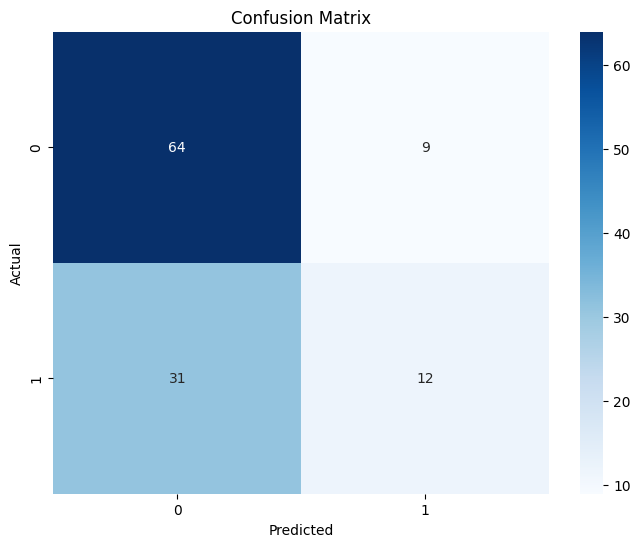

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

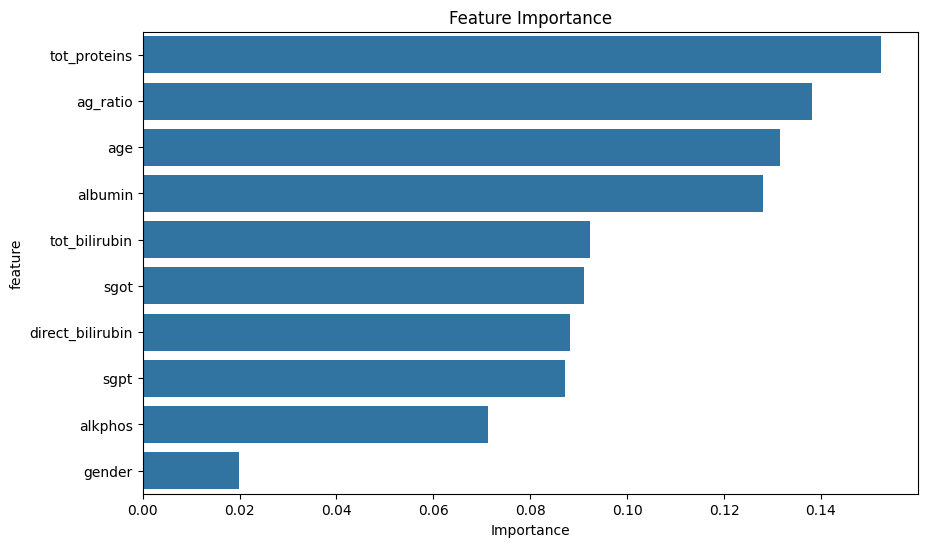

In [18]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

In [19]:
def predict_liver_disease(patient_data):
    """
    Predict liver disease for a new patient

    Parameters:
    patient_data: dict with keys corresponding to feature names
    """
    # Convert patient data to DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Scale the features
    patient_scaled = scaler.transform(patient_df)

    # Make prediction
    prediction = rf_model.predict(patient_scaled)
    probability = rf_model.predict_proba(patient_scaled)

    return {
        'prediction': 'Liver Patient' if prediction[0] == 1 else 'Not Liver Patient',
        'probability': probability[0][1]
    }

# Example usage of the prediction function
example_patient = {
    'age': 64,
    'gender': 1,  # Male
    'tot_bilirubin': 0.9,
    'direct_bilirubin': 0.3,
    'tot_proteins': 310,
    'albumin': 61,
    'ag_ratio': 58,
    'sgpt': 7,
    'sgot': 3.4,
    'alkphos': 0.9
}

print("\nExample Prediction:")
result = predict_liver_disease(example_patient)
print(result)


Example Prediction:
{'prediction': 'Not Liver Patient', 'probability': 0.63}


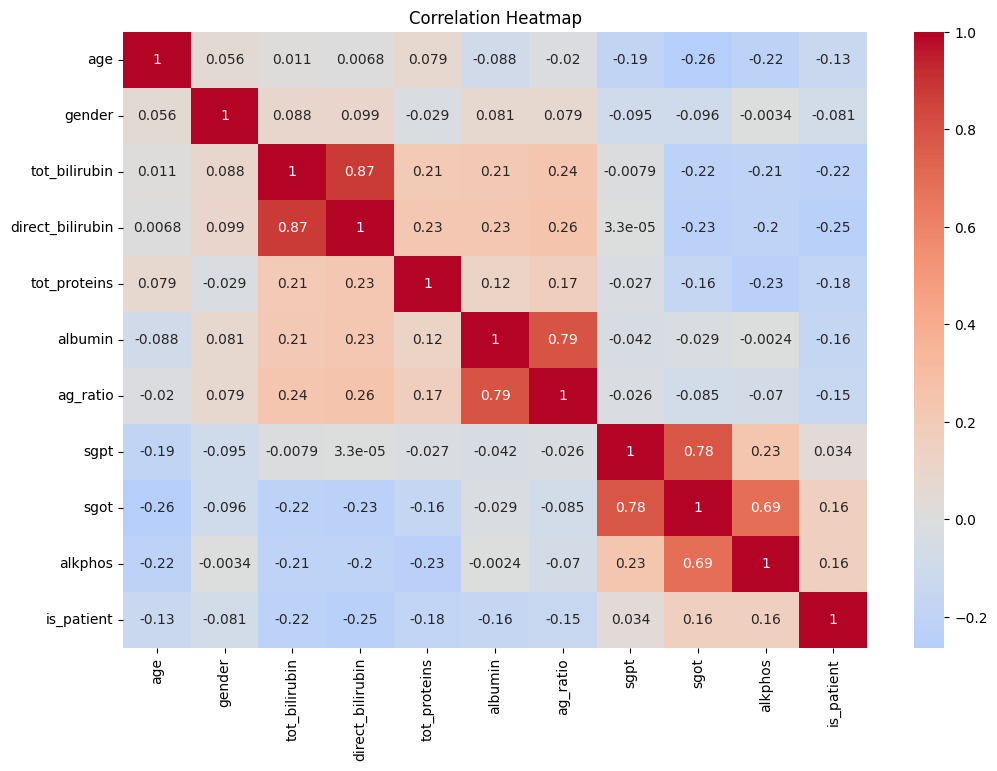

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

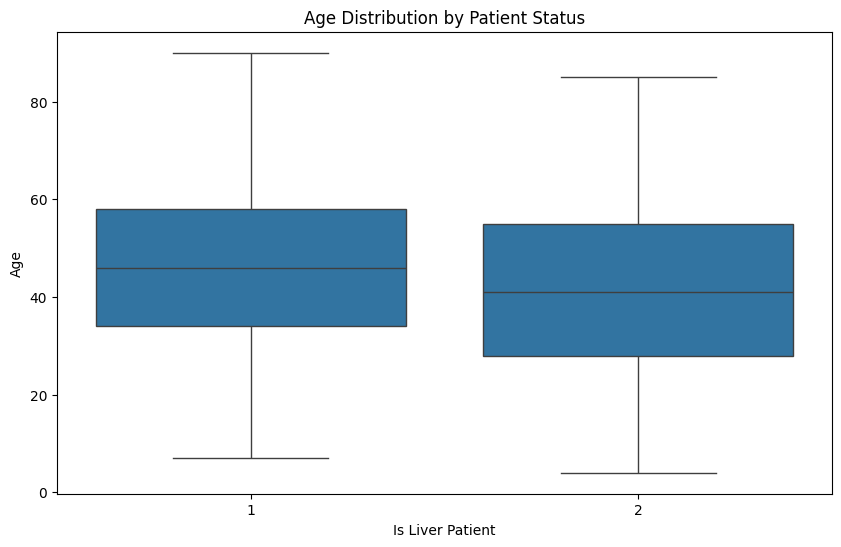

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_patient', y='age', data=df)
plt.title('Age Distribution by Patient Status')
plt.xlabel('Is Liver Patient')
plt.ylabel('Age')
plt.show()

In [22]:
import pickle

# Save the model
with open('liver_disease_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
